In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [4]:
df.tail()

,Index,Height(Inches),Weight(Pounds)
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682
24999,25000,68.87761,124.8742


Text(0, 0.5, 'Weight(Pounds)')

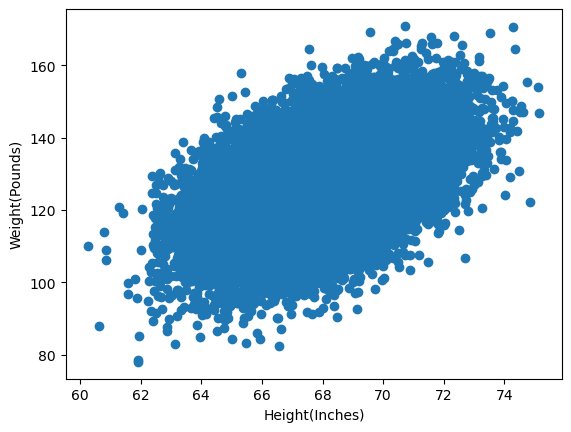

In [14]:
plt.scatter(df['Height(Inches)'],df['Weight(Pounds)'])
plt.xlabel('Height(Inches)')
plt.ylabel('Weight(Pounds)')

In [8]:
df.corr()

,Index,Height(Inches),Weight(Pounds)
Index,1.000000,0.009626,-0.007257
Height(Inches),0.009626,1.000000,0.502859
Weight(Pounds),-0.007257,0.502859,1.000000


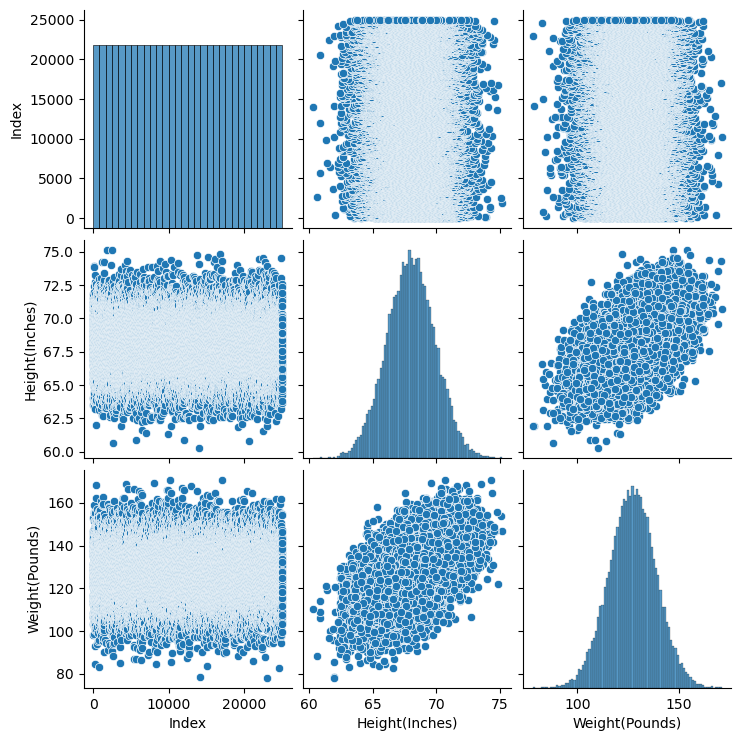

In [10]:
import seaborn as sns
sns.pairplot(df)

In [17]:
X=df[['Height(Inches)']] # independent data in 2d array
Y=df['Weight(Pounds)'] # dependent data or the output
X


,Height(Inches)
0,65.78331
1,71.51521
2,69.39874
3,68.21660
4,67.78781
...,...
24995,69.50215
24996,64.54826
24997,64.69855
24998,67.52918


In [18]:
Y

0        112.9925
1        136.4873
2        153.0269
3        142.3354
4        144.2971
           ...   
24995    118.0312
24996    120.1932
24997    118.2655
24998    132.2682
24999    124.8742
Name: Weight(Pounds), Length: 25000, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
#random state most popularly used is 42 controls the random split and keeps the value in same rows until the last in trainning and testing
#test data size is 25% and train data sie is 75%

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler=StandardScaler()

In [37]:
scaler.fit_transform(X_train)


array([[ 1.04422761],
       [-1.26515425],
       [-1.45158213],
       ...,
       [ 0.2108769 ],
       [ 0.68769241],
       [-0.45684105]], shape=(18750, 1))

In [38]:
scaler.transform(X_test)

array([[ 0.22723439],
       [-0.05128615],
       [-0.17655812],
       ...,
       [ 0.66083975],
       [-1.80229195],
       [-2.34404669]], shape=(6250, 1))

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
regression=LinearRegression(n_jobs=-1)

In [51]:
regression.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [52]:
print(f"Coffeicient value or slope:{regression.coef_}") #coeff this the beta1 value in the equation
print(f"Intercept:{regression.intercept_}")  

Coffeicient value or slope:[3.07218628]
Intercept:-81.82045041994732


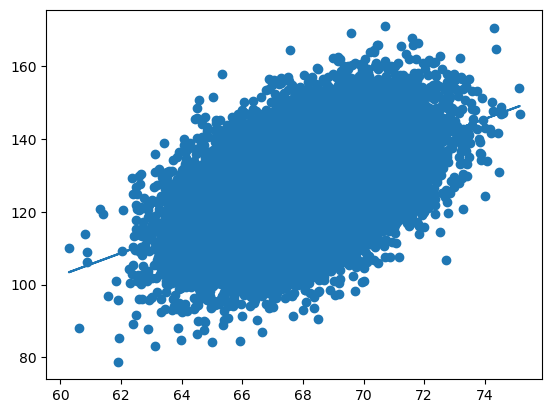

In [56]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))

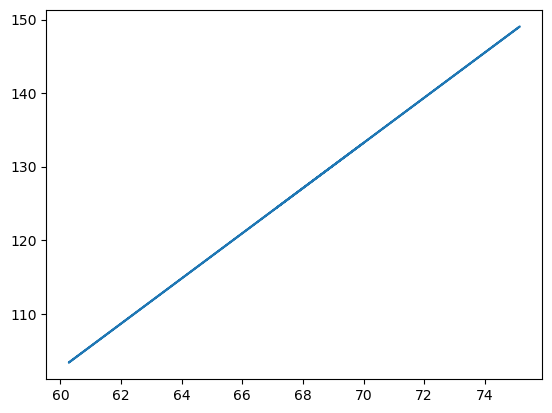

In [57]:
plt.plot(X_train,regression.predict(X_train))

In [58]:
y_pred=regression.predict(X_test)

In [59]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [60]:
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rmse=np.sqrt(mse)Th
print(mse)
print(mae)
print(rmse)

102.34698512064793
8.041117903549644
10.116668677022487


In [2]:
from sklearn.metrics import r2_score

In [ ]:
score=r2_score(Y_test,y_pred)
print(Score)

In [64]:
1-(1-score)*(len(Y_test)/(len(Y_test)-X_test.shape[1]-1))

0.2590676511411284

In [65]:
import statsmodels.api as sm

In [66]:
model=sm.OLS(Y_train,X_train).fit()

In [67]:
prediction=model.predict(X_test)
print(prediction)

6868     127.937968
24016    126.951029
9668     126.507127
13640    129.038364
14018    129.033802
            ...    
24717    119.225778
2578     129.666102
10121    129.474450
21601    120.746330
3474     118.826620
Length: 6250, dtype: float64


In [68]:
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:         Weight(Pounds)   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          2.847e+06
Date:                Mon, 26 Jan 2026   Prob (F-statistic):                        0.00
Time:                        10:25:51   Log-Likelihood:                         -70372.
No. Observations:               18750   AIC:                                  1.407e+05
Df Residuals:                   18749   BIC:                                  1.408e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [74]:
regression.predict([[
68.87761
]])

E:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([129.78439772])